# Implementation of Linear Regression By Using Normal Equation

At this step I add necessary tools to our notebook.

In [1]:
#for numerical and matrix things
import numpy as np

#for things like getting sum and mean
import pandas as pd

#for ploting figures
%matplotlib inline
import matplotlib.pyplot as plt

#loading our dataset
from sklearn.datasets import load_diabetes


At this step I define X , Y for dataset to make a linear Regression implement.

In [2]:
X_diabetes, y_diabetes = load_diabetes(return_X_y=True)

#to make it easier for later
X = X_diabetes
Y= y_diabetes

#let's take a look at our X, Y data dimension
print(X.shape)
print(Y.shape)

(442, 10)
(442,)


At this step I add a bias to X <br>
that's because once we multiplie X and $\beta$ to get y, we need a bias in our equation.

In [3]:
#Adding a bias to X
X_b = np.c_[np.ones([len(X), 1]), X]

At this step we split our data to training and test with ratio of 70% and 30% for each.

In [4]:
#in order to have a fix output around all runs
np.random.seed(2042)

#test ratio is 30%
test_ratio = 0.3
total_size = len(X_b)

test_size = int(test_ratio * total_size)
train_size = total_size - test_size

#in order to have randon Train and Test
rnd_indices = np.random.permutation(total_size)

X_train = X_b[rnd_indices[:train_size]]
X_test = X_b[rnd_indices[train_size:]]
Y_train = Y[rnd_indices[:train_size]]
Y_test = Y[rnd_indices[train_size:]]

Now it's time to implement equation : <br>
$\hat{\theta} = (X^{T}.X)^{-1}.X^{T}.y$

In [5]:
#writing normal equation
Theta_hat = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(Y_train)
print(Theta_hat.shape)
print(Theta_hat)

(11,)
[ 153.80297286   19.70314614 -175.49893906  610.67778789  287.51155318
 -385.48553379  179.0466207   -47.59277311  107.81873576  516.48046603
   74.46240035]


Now we calculate $\hat{Y}$ according to this equation : <br>
$\hat{Y} = X.\hat{\theta}$

In [6]:
Y_hat = X_test.dot(Theta_hat)
Y_hat.shape

(132,)

let's take a quick look at how much Y and $\hat{Y}$ different.

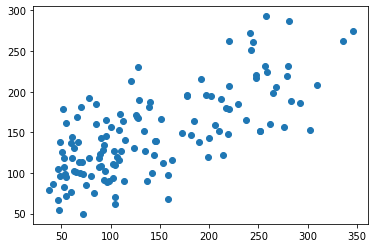

In [7]:
plt.plot(Y_test,Y_hat,'o')

calculating RSS according to this equation :<br>
$RSS = \Sigma(Y^{2} - \hat{Y}^{2})$

In [8]:
RSSs = Y_test**2 - Y_hat**2
RSS = RSSs.sum()
RSS

225732.1684990271

Calculating TSS which is Variance of Y

In [9]:
TSSs = Y_test**2. - Y.mean()**2
TSS = TSSs.sum()
TSS


443961.19553244184

Calculating $R^{2}$ according to this equation : <br>
<br>
$R^{2} = \frac{(TSS - RSS)}{TSS}$

In [10]:
R_Squared = (TSS - RSS)/TSS
R_Squared

0.4915497778396895

*Thanks for reading this*